In [1]:
# !pip install spotipy

In [2]:
# pip install scikit-learn

In [3]:
#nj - url https://open.spotify.com/playlist/37i9dQZF1EJEENiXSiUJNC?si=4f1e03b41a654958

# birthday - url : https://open.spotify.com/playlist/2j02Hr9EK6CtOj79Yy7XMe?si=9be6775c8a754e48

#playlist ID 
# nj playlist = 37i9dQZF1EJEENiXSiUJNC 
# bday playlist = 2j02Hr9EK6CtOj79Yy7XMe
# Latin indie PL = 3PdZ2o7zuWvsozdBvtOblv

# client_id = '2a5a37ada864405cba1dbbb8f58aca4d' 
# client_secret = '8d0569335fef4aa196aa3d8961a9acaa' 

#ran using splinter env

# source splinter/bin/activate

In [4]:

import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '2a5a37ada864405cba1dbbb8f58aca4d' 
client_secret = '8d0569335fef4aa196aa3d8961a9acaa' 

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlist_id='3PdZ2o7zuWvsozdBvtOblv' 
results = sp.playlist(playlist_id)

In [5]:
# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

final_df.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,6LOZws7T3jqZz78unPgFF9,Isolation,Dead To Me,Kali Uchis,False,79,0.675,0.761,4,-4.469,...,0.0000,0.1020,0.428,119.001,audio_features,spotify:track:6LOZws7T3jqZz78unPgFF9,https://api.spotify.com/v1/tracks/6LOZws7T3jqZ...,https://api.spotify.com/v1/audio-analysis/6LOZ...,3.325100,4
1,7ukQ49ilGpTfivGRtYda4E,Regresa,Nydia,Buscabulla,False,36,0.682,0.605,1,-9.343,...,0.4800,0.1140,0.364,108.956,audio_features,spotify:track:7ukQ49ilGpTfivGRtYda4E,https://api.spotify.com/v1/tracks/7ukQ49ilGpTf...,https://api.spotify.com/v1/audio-analysis/7ukQ...,4.233083,4
2,55DyBUkjebkcYhDGfEXitR,Cariño,Cariño,The Marías,False,11,0.647,0.385,0,-13.717,...,0.0569,0.1170,0.660,113.982,audio_features,spotify:track:55DyBUkjebkcYhDGfEXitR,https://api.spotify.com/v1/tracks/55DyBUkjebkc...,https://api.spotify.com/v1/audio-analysis/55Dy...,4.311900,4
3,1jecO8NeYLsVWVptITz4c1,Tú,Tú,maye,False,65,0.732,0.555,5,-7.973,...,0.0000,0.1120,0.730,114.982,audio_features,spotify:track:1jecO8NeYLsVWVptITz4c1,https://api.spotify.com/v1/tracks/1jecO8NeYLsV...,https://api.spotify.com/v1/audio-analysis/1jec...,3.443533,4
4,0btkyN6uJvHFdRxlVrUaJv,Nubes,Nubes,Nicole Horts,False,5,0.820,0.361,8,-8.049,...,0.0000,0.0941,0.426,105.034,audio_features,spotify:track:0btkyN6uJvHFdRxlVrUaJv,https://api.spotify.com/v1/tracks/0btkyN6uJvHF...,https://api.spotify.com/v1/audio-analysis/0btk...,2.900883,4


In [6]:
#average value for each category

music_feature= features_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
music_feature.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,0.662418,0.510018,-9.184473,0.076096,0.445578,0.107905,0.155275,0.481273,109.031327,3.520415
std,0.128124,0.174674,2.656453,0.068794,0.274698,0.214360,0.099892,0.229445,28.989158,0.722024
min,0.326000,0.127000,-18.559000,0.024500,0.019900,0.000000,0.045400,0.109000,61.011000,1.706200
25%,0.591000,0.387500,-10.270500,0.032450,0.218500,0.000003,0.103000,0.337000,84.969000,3.128142
50%,0.675000,0.498000,-8.803000,0.049100,0.442000,0.001790,0.119000,0.425000,105.034000,3.538300
75%,0.734000,0.649500,-7.666500,0.077400,0.677500,0.039950,0.171500,0.683500,119.147500,4.041500
max,0.884000,0.874000,-4.469000,0.329000,0.988000,0.824000,0.601000,0.900000,185.841000,5.200000


In [7]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
music_feature.loc[:]=min_max_scaler.fit_transform(music_feature.loc[:])

### Creating a Radar Chart
-----


In [8]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from matplotlib import colormaps
# list(colormaps)

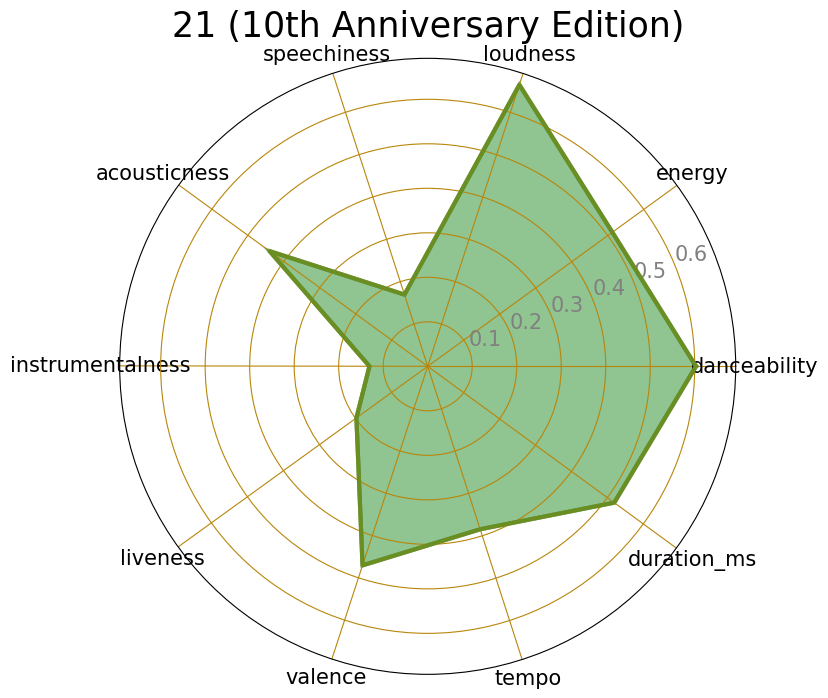

In [9]:
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
pi= 3.14 # define pi as a numerical variable


# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value, color="olivedrab", lw=3, label="a line")
plt.fill(angles,value,alpha=0.5, facecolor='forestgreen', edgecolor='darkgreen', linewidth=3)


plt.title('21 (10th Anniversary Edition)', size=25)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.tick_params(grid_color='darkgoldenrod')
plt.show()